
 <font size="5"> <div class="alert alert-block alert-info"> Introdução a Modelos Dinâmicos (IMD): Semana 6 (Aula P12) </div> </font> 

     
    
  <font size="5"> Licenciatura em Ciência de Dados </font>
  
  
  
  <font size="4"> **Diana Aldea Mendes**</font>
  
  
    
  <font size="3"> diana.mendes@iscte-iul.pt </font> 
  
  
  <font size="4"> ISCTE-IUL, 19 de março de 2024 </font>
   
   
 
    
 
   
  <font size="5"> <div class="alert alert-success" role="alert"> Modelos ARMA/SARIMAX - Exemplos 2 </div></font> 

In [ ]:
library(car)  # para bases de dados e gráficos
library(lmtest)  # para testes de hipótese sobre os pressupostos dos resíduos
library(tseries)  # teste de Jarque-Bera
library(ggplot2)   # gráficos
library(tidyr)   # data-frames
library(MASS)   # estatística, bases de dados, regressão
library(forecast)  # forecast e séries temporais
library(Quandl)   # importar dados de Net (Yahoo Finance, FRED)
library(TSstudio)   # biblioteca do livro de Rami Krispin, séries temporais
library(dplyr)
library(tidyverse)
library(pdfetch)
library(zoo)   # base para séries temporais (date)
library(plotly)   # gráficos dinâmicos (geral para R, Python, Julia)
library(PerformanceAnalytics)
library(dynlm)  # moelos de regressão dinâmica
library(urca)   # testes de raiz unitária
library(egcm)
library(corrplot)  # correlação
library(roll)   # rolling windows
library(xts)   # base de séries temporais (junto com zoo)
library(rlang)
library(Metrics)  # métricas de performance
library(lubridate)
library(astsa)  # acf e pacf (correlograma), séries temporais, bases de dados
library(fpp2)
#library(aTSA)
library(FinTS)
install.packages("AER")
library(AER) ### macro data
#library(skimr)

Installing package into 'C:/Users/jricv/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'AER' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\jricv\AppData\Local\Temp\Rtmpe6U35m\downloaded_packages


Warning message:
"package 'AER' was built under R version 4.3.3"
Loading required package: sandwich

Warning message:
"package 'sandwich' was built under R version 4.3.3"
Loading required package: survival



In [3]:
# importar  os dados de AER
data("USMacroG")
df<- USMacroG
head(df)

,gdp,consumption,invest,government,dpi,cpi,m1,tbill,unemp,population,inflation,interest
1950 Q1,1610.5,1058.9,198.1,361.0,1186.1,70.6,110.20,1.12,6.4,149.461,NA,NA
1950 Q2,1658.8,1075.9,220.4,366.4,1178.1,71.4,111.75,1.17,5.6,150.260,4.5071,-3.3404
1950 Q3,1723.0,1131.0,239.7,359.6,1196.5,73.2,112.95,1.23,4.6,151.064,9.9590,-8.7290
1950 Q4,1753.9,1097.6,271.8,382.5,1210.0,74.9,113.93,1.35,4.2,151.871,9.1834,-7.8301
1951 Q1,1773.5,1122.8,242.9,421.9,1207.9,77.3,115.08,1.40,3.5,152.393,12.6160,-11.2160
1951 Q2,1803.7,1091.4,249.2,480.1,1225.8,77.6,116.19,1.53,3.1,152.917,1.5494,-0.0161


In [4]:
summary(USMacroG)

      gdp        consumption       invest         government          dpi      
 Min.   :1610   Min.   :1059   Min.   : 197.7   Min.   : 359.6   Min.   :1178  
 1st Qu.:2602   1st Qu.:1640   1st Qu.: 309.3   1st Qu.: 740.6   1st Qu.:1822  
 Median :4142   Median :2715   Median : 568.5   Median : 952.0   Median :3133  
 Mean   :4563   Mean   :2999   Mean   : 652.3   Mean   : 997.0   Mean   :3341  
 3rd Qu.:6294   3rd Qu.:4235   3rd Qu.: 874.1   3rd Qu.:1300.8   3rd Qu.:4733  
 Max.   :9304   Max.   :6341   Max.   :1801.6   Max.   :1582.8   Max.   :6635  
                                                                               
      cpi               m1             tbill            unemp       
 Min.   : 70.60   Min.   : 110.2   Min.   : 0.810   Min.   : 2.600  
 1st Qu.: 91.15   1st Qu.: 147.5   1st Qu.: 3.087   1st Qu.: 4.400  
 Median :162.10   Median : 284.4   Median : 5.045   Median : 5.600  
 Mean   :225.82   Mean   : 453.9   Mean   : 5.229   Mean   : 5.675  
 3rd Qu.:350.12

In [5]:
df1<-window(df, start=c(1950,2))
head(df1)

,gdp,consumption,invest,government,dpi,cpi,m1,tbill,unemp,population,inflation,interest
1950 Q2,1658.8,1075.9,220.4,366.4,1178.1,71.4,111.75,1.17,5.6,150.260,4.5071,-3.3404
1950 Q3,1723.0,1131.0,239.7,359.6,1196.5,73.2,112.95,1.23,4.6,151.064,9.9590,-8.7290
1950 Q4,1753.9,1097.6,271.8,382.5,1210.0,74.9,113.93,1.35,4.2,151.871,9.1834,-7.8301
1951 Q1,1773.5,1122.8,242.9,421.9,1207.9,77.3,115.08,1.40,3.5,152.393,12.6160,-11.2160
1951 Q2,1803.7,1091.4,249.2,480.1,1225.8,77.6,116.19,1.53,3.1,152.917,1.5494,-0.0161
1951 Q3,1839.8,1103.9,230.1,534.2,1235.8,78.2,117.76,1.63,3.2,153.443,3.0809,-1.4542


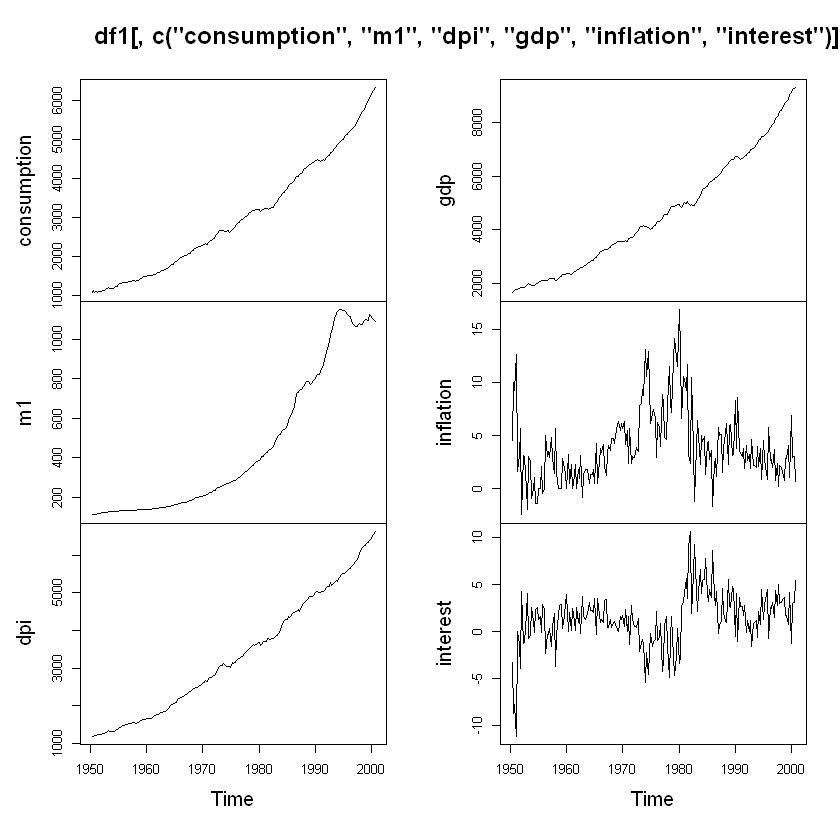

In [6]:
plot(df1[, c("consumption", "m1", "dpi", "gdp", "inflation", "interest")])

In [7]:
str(df1)

 Time-Series [1:203, 1:12] from 1950 to 2001: 1659 1723 1754 1774 1804 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:12] "gdp" "consumption" "invest" "government" ...


In [8]:
# separar em conjunto de treino e conjunto de teste, vamos usar a função window

# conjunto de treino
train = window(df1, start=c(1950,2), end=c(1995,4))

# conjunto de teste

test = window(df1, start=c(1996,1), end=c(2000,4))

In [9]:
# primeiras observações do conjunto de treino

head(train)

,gdp,consumption,invest,government,dpi,cpi,m1,tbill,unemp,population,inflation,interest
1950 Q2,1658.8,1075.9,220.4,366.4,1178.1,71.4,111.75,1.17,5.6,150.260,4.5071,-3.3404
1950 Q3,1723.0,1131.0,239.7,359.6,1196.5,73.2,112.95,1.23,4.6,151.064,9.9590,-8.7290
1950 Q4,1753.9,1097.6,271.8,382.5,1210.0,74.9,113.93,1.35,4.2,151.871,9.1834,-7.8301
1951 Q1,1773.5,1122.8,242.9,421.9,1207.9,77.3,115.08,1.40,3.5,152.393,12.6160,-11.2160
1951 Q2,1803.7,1091.4,249.2,480.1,1225.8,77.6,116.19,1.53,3.1,152.917,1.5494,-0.0161
1951 Q3,1839.8,1103.9,230.1,534.2,1235.8,78.2,117.76,1.63,3.2,153.443,3.0809,-1.4542


## Modelo ARIMA e previsão para a série temporal "consumption"

In [ ]:
# isolar a série temporal "consumption" e usar auto.arima para ajustar o melhor modelo sobre o conjunto de treino
tsc <- train[ ,c("consumption")]
arima_model <- auto.arima(tsc)
summary(arima_model)

Series: tsc 
ARIMA(2,2,1) 

Coefficients:
         ar1     ar2      ma1
      0.1434  0.2168  -0.9672
s.e.  0.0769  0.0772   0.0197

sigma^2 = 442.4:  log likelihood = -807.68
AIC=1623.36   AICc=1623.59   BIC=1636.16

Training set error measures:
                  ME     RMSE     MAE        MPE      MAPE      MASE
Training set 1.80714 20.74466 15.1324 0.05015966 0.6200162 0.1653038
                    ACF1
Training set -0.02179196

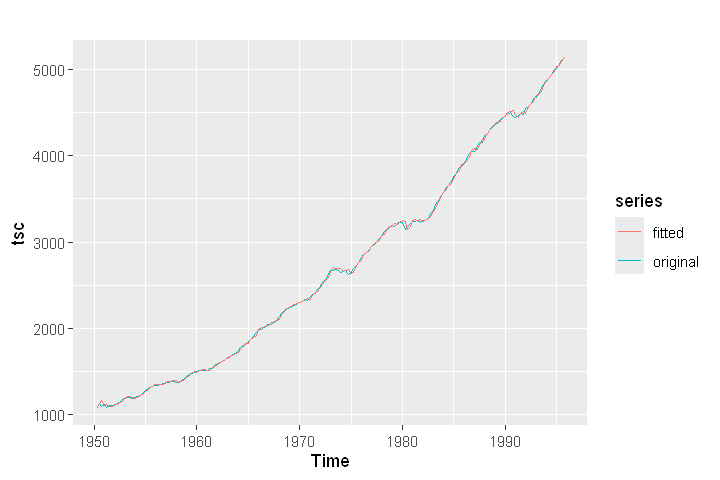

In [11]:
# visualizar os valores do conjunto de treino e os valores ajustados (fitted) pelo modelo Arima
options(repr.plot.width=6, repr.plot.height=4)
autoplot(tsc, series="original") + autolayer(fitted(arima_model), series="fitted")

In [ ]:
# forecast sobre o conjunto de teste (20 observações)
fore_arima = forecast::forecast(arima_model, h=20)

# no conjunto de teste, considerar apaenas a variável de interesse (consumption)
test2 <-test[ ,c("consumption")]

# isolar os valores preditos
df_fcst = as.data.frame(fore_arima)

# calcular o MAPE para os valores preditos com o modelo ARIMA e o conjunto de teste
mape(test2, df_fcst$'Point Forecast')

[1] 0.0420386

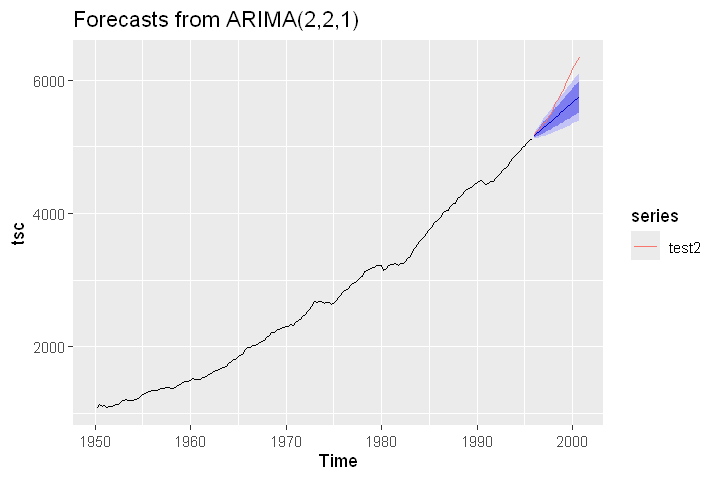

In [13]:
# comparar graficamente os valores preditos e o conjunto de teste
arima_model %>%
forecast(h=20) %>%
autoplot() + autolayer(test2)

## Regressão com séries temporais

In [14]:
library(dynlm) # package para regressão de séries temporais

# modelo 1 (lag na variável independente)
cons_lm1 <- dynlm(consumption ~ dpi + L(dpi)+L(consumption), data = train) # note L() para crear variaveis desfasadas (lag)
summary(cons_lm1)


Time series regression with "ts" data:
Start = 1950(3), End = 1995(4)

Call:
dynlm(formula = consumption ~ dpi + L(dpi) + L(consumption), 
    data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-68.976  -9.011   0.419   9.624  53.855 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     2.10493    3.49524   0.602    0.548    
dpi             0.34335    0.04697   7.310 8.70e-12 ***
L(dpi)         -0.30167    0.04952  -6.092 6.71e-09 ***
L(consumption)  0.95752    0.02907  32.939  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 18.77 on 178 degrees of freedom
Multiple R-squared:  0.9998,	Adjusted R-squared:  0.9998 
F-statistic: 2.467e+05 on 3 and 178 DF,  p-value: < 2.2e-16


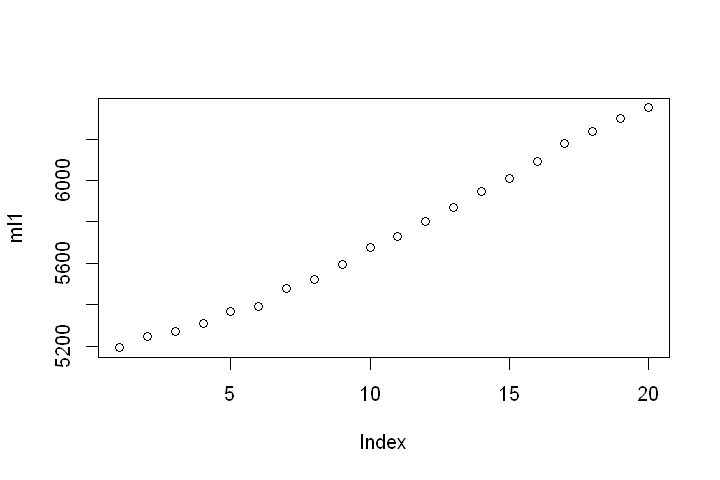

In [15]:
# previsão sobre o conjunto de test (o mesmo que no caso univariado)
ml1<-predict(cons_lm1,newdata=test)
plot(ml1)

In [ ]:
# modelo 2 (lag na variável dependente)
cons_lm2 <- dynlm(consumption ~ dpi + L(consumption),  data = train)
summary(cons_lm2)


Time series regression with "ts" data:
Start = 1950(3), End = 1995(4)

Call:
dynlm(formula = consumption ~ dpi + L(consumption), data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-94.959  -9.328   1.030  13.619  45.820 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     4.42806    3.80875   1.163 0.246538    
dpi             0.09789    0.02646   3.699 0.000287 ***
L(consumption)  0.89565    0.02986  29.996  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 20.58 on 179 degrees of freedom
Multiple R-squared:  0.9997,	Adjusted R-squared:  0.9997 
F-statistic: 3.079e+05 on 2 and 179 DF,  p-value: < 2.2e-16


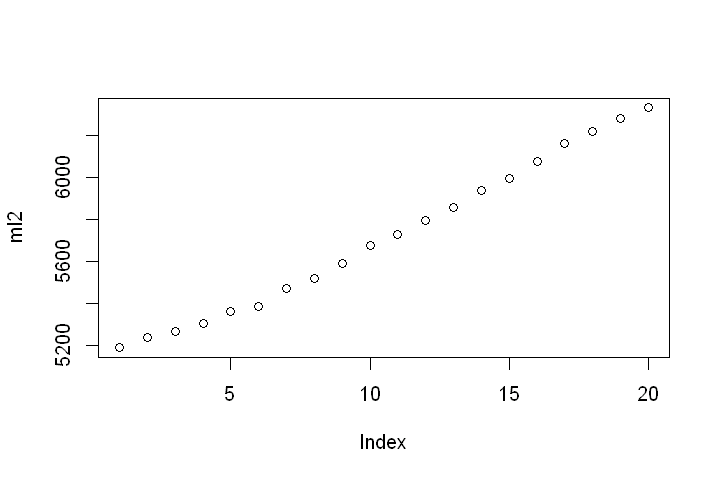

In [17]:
# previsão sobre o conjunto de teste
ml2<- predict(cons_lm2,newdata=test)
plot(ml2)

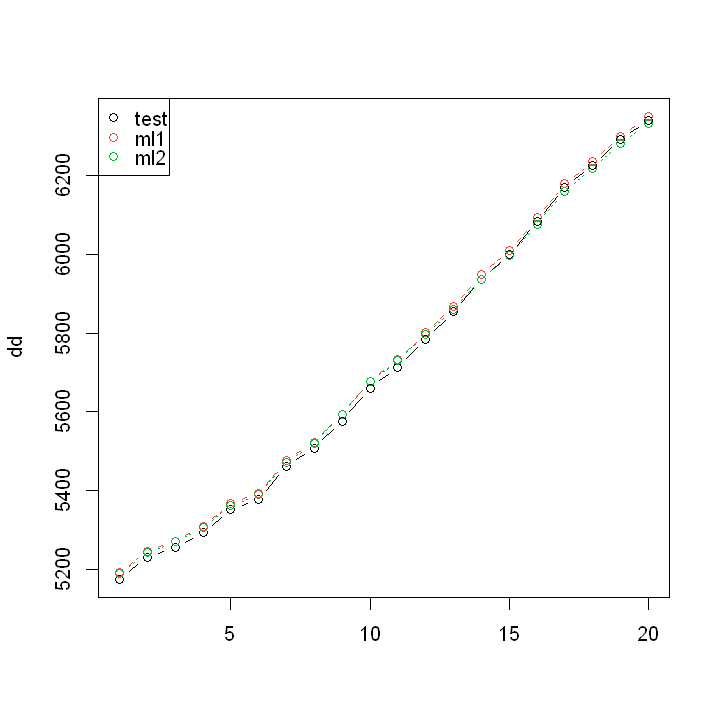

In [ ]:
# comparar as previsões
options(repr.plot.width=6, repr.plot.height=6)
dd<-cbind(test2,ml1,ml2)
matplot(dd, type = "b", pch=1,col = 1:3)
legend("topleft", legend = c("test","ml1","ml2"), col=1:3, pch=1)